# what proportion of the wiki biography articles include at least 3 images 

In [12]:
import requests
import time
import pandas as pd

In [43]:
import requests
print("working")
df = []

url = "https://en.wikipedia.org/w/api.php"

headers = {
    'User-Agent': 'StatisticsEducationBot/1.0 (Statistics Class Project; educational use)'
}
total_count = 0
while total_count < 100:
    count = 0
    with_more_than_one_photo = 0
    
    while count < 10:
    
        # 1) Get a random article
        params = {
            "action": "query",
            "list": "random",
            "rnnamespace": 0,
            "rnlimit": 1,
            "format": "json"
        }
    
        session = requests.Session()
        response = session.get(url=url, params=params, headers=headers)
        data = response.json()
    
        pageid = data["query"]["random"][0]["id"]
    
        # 2) Get categories for this article (to see if it’s a biography)
        params2 = {
            "action": "query",
            "pageids": pageid,
            "prop": "categories",
            "cllimit": "max",
            "format": "json"
        }
    
        cat_data = session.get(url=url, params=params2, headers=headers).json()
    
        try:
            categories = [c["title"] for c in cat_data["query"]["pages"][str(pageid)]["categories"]]
        except KeyError:
            continue  # no categories → skip
    
        # If not biography → skip
        if not any("Living people" in c or "births" in c for c in categories):
            continue
    
        # 3) Count images
        params3 = {
            "action": "query",
            "pageids": pageid,
            "prop": "images",
            "imlimit": "max",
            "format": "json"
        }
    
        img_data = session.get(url=url, params=params3, headers=headers).json()
    
        try:
            images = img_data["query"]["pages"][str(pageid)]["images"]
            num_images = len(images)
        except KeyError:
            num_images = 0
    
        count += 1
    
        if num_images > 2:
            with_more_than_one_photo += 1
    
    
    print("Proportion =", with_more_than_one_photo / 10)
    df.append(with_more_than_one_photo / 10)
    total_count += 1
print(df)

working
Proportion = 0.4
Proportion = 0.6
Proportion = 0.6
Proportion = 0.6
Proportion = 0.4
Proportion = 0.3
Proportion = 0.6
Proportion = 0.3
Proportion = 0.8
Proportion = 0.4
Proportion = 0.5
Proportion = 0.4
Proportion = 0.5
Proportion = 0.5
Proportion = 0.4
Proportion = 0.4
Proportion = 0.3
Proportion = 0.6
Proportion = 0.5
Proportion = 0.3
Proportion = 0.7
Proportion = 0.4
Proportion = 0.4
Proportion = 0.6
Proportion = 0.6
Proportion = 0.4
Proportion = 0.3
Proportion = 0.2
Proportion = 0.4
Proportion = 0.3
Proportion = 0.4
Proportion = 0.6
Proportion = 0.4
Proportion = 0.4
Proportion = 0.7
Proportion = 0.4
Proportion = 0.5
Proportion = 0.3
Proportion = 0.3
Proportion = 0.4
Proportion = 0.6
Proportion = 0.6
Proportion = 0.5
Proportion = 0.7
Proportion = 0.3
Proportion = 0.4
Proportion = 0.8
Proportion = 0.5
Proportion = 0.5
Proportion = 0.2
Proportion = 0.5
Proportion = 0.3
Proportion = 0.3
Proportion = 0.5
Proportion = 0.6
Proportion = 0.5
Proportion = 0.7
Proportion = 0.6
Propor

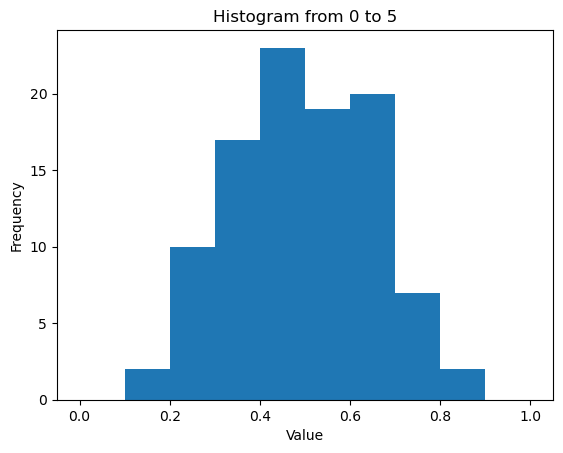

In [45]:
bins = [0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]
plt.hist(df, bins = bins)

plt.xlabel("Value")
plt.ylabel("Frequency")
plt.title("Histogram from 0 to 5")
plt.show()

In [47]:
mean = np.mean(df)

# Standard deviation (sample std, set ddof=1)
std = np.std(df, ddof=1)

# Standard error: std / sqrt(n)
se = std / np.sqrt(len(df))

print("Mean:", round(mean, 3))
print("Standard deviation:", round(std, 3))
print("Standard error:", round(se, 3))

Mean: 0.445
Standard deviation: 0.159
Standard error: 0.016


# my mean is .445, my std is 15.9% and my standard error is 1.6%

# in the graph above it follows an about normal structure 

# 44.5% of the wiki has at least 3 photos in it, this could be off by plus of minus 1.6%